<a href="https://colab.research.google.com/github/abhiksark/Diabetic-Retnopathy-Classification-ConvolutionalNeuralNetwork/blob/master/FastAi_DR_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 18.7MB/s 


In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/{accelerator}/torch_nightly.html
  
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu100/torch_nightly.html
    100% |████████████████████████████████| 696.4MB 21kB/s 
1.0.0.dev20190319
True
True
    100% |████████████████████████████████| 17.3MB 2.1MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [0]:

!wget http://files.fast.ai/models/weights.tgz 
!mkdir /usr/local/lib/python3.6/dist-packages/fastai/weights
!tar -xvzf weights.tgz -C /usr/local/lib/python3.6/dist-packages/fastai/

--2019-03-20 02:44:08--  http://files.fast.ai/models/weights.tgz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1195411318 (1.1G) [text/plain]
Saving to: ‘weights.tgz’

weights.tgz         100%[===================>]   1.11G  15.9MB/s    in 75s     

2019-03-20 02:45:23 (15.3 MB/s) - ‘weights.tgz’ saved [1195411318/1195411318]

weights/
weights/wrn_50_2f.pth
weights/resnext_101_32x4d.pth
weights/resnext_101_64x4d.pth
weights/inceptionresnetv2-d579a627.pth
weights/inceptionv4-97ef9c30.pth
weights/resnext_50_32x4d.pth


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id_ = ""

downloaded = drive.CreateFile({'id':id_}) 
downloaded.GetContentFile('train.zip')   

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id_ = ""

downloaded = drive.CreateFile({'id':id_}) 
downloaded.GetContentFile('val.zip')   

In [0]:
%%capture
!unzip train.zip 
!unzip val.zip

In [0]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from sklearn.utils import shuffle
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

In [0]:
def resize(PATH):
  images = os.listdir(PATH);
  for image in images:
    name = PATH + image
    im = cv2.imread(name)
    im = cv2.resize (im, (256, 256));
    cv2.imwrite(name, im)

In [0]:
!ls tmp

train  val


In [0]:
%time resize("tmp/train/0/")
%time resize("tmp/train/1/")
%time resize("tmp/train/2/")
%time resize("tmp/train/3/")
%time resize("tmp/train/4/")

%time resize("tmp/val/0/")
%time resize("tmp/val/1/")
%time resize("tmp/val/2/")
%time resize("tmp/val/3/")
%time resize("tmp/val/4/")

CPU times: user 17.8 s, sys: 2.13 s, total: 19.9 s
Wall time: 20 s
CPU times: user 5.67 s, sys: 616 ms, total: 6.29 s
Wall time: 6.3 s
CPU times: user 12.1 s, sys: 1.44 s, total: 13.5 s
Wall time: 13.5 s
CPU times: user 7.94 s, sys: 921 ms, total: 8.86 s
Wall time: 8.88 s
CPU times: user 6.35 s, sys: 746 ms, total: 7.09 s
Wall time: 7.11 s
CPU times: user 4.46 s, sys: 495 ms, total: 4.96 s
Wall time: 4.97 s
CPU times: user 1.42 s, sys: 153 ms, total: 1.57 s
Wall time: 1.57 s
CPU times: user 2.99 s, sys: 345 ms, total: 3.33 s
Wall time: 3.34 s
CPU times: user 1.95 s, sys: 225 ms, total: 2.18 s
Wall time: 2.18 s
CPU times: user 1.58 s, sys: 197 ms, total: 1.77 s
Wall time: 1.77 s


In [0]:
"""shuffled_data = shuffle(data)

fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('Histopathologic scans of lymph node sections',fontsize=20)
# Negatives
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 0]['id'][:5]):
    path = os.path.join(train_path, idx)
    ax[0,i].imshow(readImage(path + '.tif'))
    # Create a Rectangle patch
    #box = patches.Rectangle((32,32),32,32,linewidth=4,edgecolor='b',facecolor='none', linestyle=':', capstyle='round')
    #ax[0,i].add_patch(box)
ax[0,0].set_ylabel('Negative samples', size='large')
# Positives
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 1]['id'][:5]):
    path = os.path.join(train_path, idx)
    ax[1,i].imshow(readImage(path + '.tif'))
ax[1,0].set_ylabel('Tumor tissue samples', size='large')"""

"shuffled_data = shuffle(data)\n\nfig, ax = plt.subplots(2,5, figsize=(20,8))\nfig.suptitle('Histopathologic scans of lymph node sections',fontsize=20)\n# Negatives\nfor i, idx in enumerate(shuffled_data[shuffled_data['label'] == 0]['id'][:5]):\n    path = os.path.join(train_path, idx)\n    ax[0,i].imshow(readImage(path + '.tif'))\n    # Create a Rectangle patch\n    #box = patches.Rectangle((32,32),32,32,linewidth=4,edgecolor='b',facecolor='none', linestyle=':', capstyle='round')\n    #ax[0,i].add_patch(box)\nax[0,0].set_ylabel('Negative samples', size='large')\n# Positives\nfor i, idx in enumerate(shuffled_data[shuffled_data['label'] == 1]['id'][:5]):\n    path = os.path.join(train_path, idx)\n    ax[1,i].imshow(readImage(path + '.tif'))\nax[1,0].set_ylabel('Tumor tissue samples', size='large')"

In [0]:
"""from sklearn.model_selection import train_test_split

# we read the csv file earlier to pandas dataframe, now we set index to id so we can perform
train_df = data.set_index('id')

#If removing outliers, uncomment the four lines below
#print('Before removing outliers we had {0} training samples.'.format(train_df.shape[0]))
#train_df = train_df.drop(labels=too_dark_idx, axis=0)
#train_df = train_df.drop(labels=too_bright_idx, axis=0)
#print('After removing outliers we have {0} training samples.'.format(train_df.shape[0]))

train_names = train_df.index.values
train_labels = np.asarray(train_df['label'].values)

# split, this function returns more than we need as we only need the validation indexes for fastai
tr_n, tr_idx, val_n, val_idx = train_test_split(train_names, range(len(train_names)), test_size=0.1, stratify=train_labels, random_state=123)"""

"from sklearn.model_selection import train_test_split\n\n# we read the csv file earlier to pandas dataframe, now we set index to id so we can perform\ntrain_df = data.set_index('id')\n\n#If removing outliers, uncomment the four lines below\n#print('Before removing outliers we had {0} training samples.'.format(train_df.shape[0]))\n#train_df = train_df.drop(labels=too_dark_idx, axis=0)\n#train_df = train_df.drop(labels=too_bright_idx, axis=0)\n#print('After removing outliers we have {0} training samples.'.format(train_df.shape[0]))\n\ntrain_names = train_df.index.values\ntrain_labels = np.asarray(train_df['label'].values)\n\n# split, this function returns more than we need as we only need the validation indexes for fastai\ntr_n, tr_idx, val_n, val_idx = train_test_split(train_names, range(len(train_names)), test_size=0.1, stratify=train_labels, random_state=123)"

In [0]:

from fastai import *
from fastai.vision import *
from torchvision.models import *    # import *=all the models from torchvision  

arch = densenet169                  # specify model architecture, densenet169 seems to perform well for this data but you could experiment
bs = 12 # specify batch size, hardware restrics this one. Large batch sizes may run out of GPU memory
sz = 256                      # input size is the crop size
MODEL_PATH = str(arch).split()[1]   # this will extrat the model name as the model file name e.g. 'resnet50'


In [0]:
PATH ='./tmp/'
tfms = get_transforms(do_flip=True,max_zoom=1.3)

data = ImageDataBunch.from_folder('./tmp',ds_tfms = tfms, valid='val', size=sz,bs=bs)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (17488 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
3,3,3,3,3
Path: tmp;

Valid: LabelList (4370 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
3,3,3,3,3
Path: tmp;

Test: None

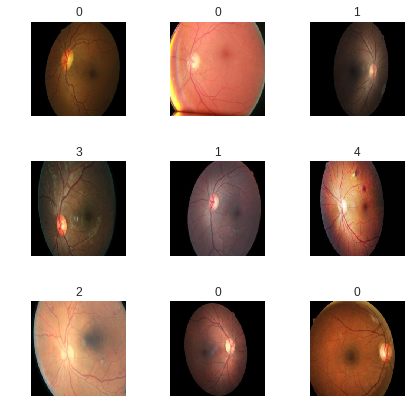

In [0]:

data.show_batch(rows=3, figsize=(6,6));

In [0]:
def getLearner():
    return cnn_learner(data, arch, pretrained=True, path='.', metrics=accuracy, ps=0.5, callback_fns=ShowGraph)

learner = getLearner()

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.torch/models/densenet169-b2777c0a.pth
57365526it [00:00, 83034144.32it/s]


In [0]:
lrs = []
losses = []
wds = []
iter_count = 600

# WEIGHT DECAY = 1e-6
learner.lr_find(wd=1e-6, num_it=iter_count)
lrs.append(learner.recorder.lrs)
losses.append(learner.recorder.losses)
wds.append('1e-6')
learner = getLearner() #reset learner - this gets more consistent starting conditions

# WEIGHT DECAY = 1e-4
learner.lr_find(wd=1e-4, num_it=iter_count)
lrs.append(learner.recorder.lrs)
losses.append(learner.recorder.losses)
wds.append('1e-4')
learner = getLearner() #reset learner - this gets more consistent starting conditions

# WEIGHT DECAY = 1e-2
learner.lr_find(wd=1e-2, num_it=iter_count)
lrs.append(learner.recorder.lrs)
losses.append(learner.recorder.losses)
wds.append('1e-2')
learner = getLearner() #reset learner


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


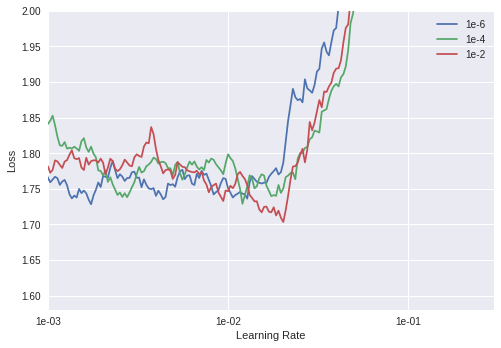

In [0]:
# Plot weight decays
_, ax = plt.subplots(1,1)
min_y = 1.6
max_y = 2
for i in range(len(losses)):
    ax.plot(lrs[i], losses[i])
    min_y = min(np.asarray(losses[i]).min(), min_y)
ax.set_ylabel("Loss")
ax.set_xlabel("Learning Rate")
ax.set_xscale('log')
#ax ranges may need some tuning with different model architectures 
ax.set_xlim((1e-3,3e-1))
ax.set_ylim((min_y - 0.02,max_y))
ax.legend(wds)
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0e'))

epoch,train_loss,valid_loss,accuracy,time
0,1.170526,1.149641,0.537757,09:12
1,1.119371,1.052709,0.577574,09:15
2,1.091547,1.018944,0.579634,09:15
3,1.025110,0.985227,0.600686,09:15
4,1.011732,0.905554,0.635469,09:15
5,0.891201,0.875664,0.646682,09:14
6,0.876942,0.854780,0.656522,09:08
7,0.821743,0.843856,0.660870,09:12


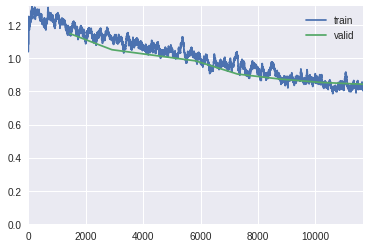

In [0]:
max_lr = 1e-3
wd = 1e-6
# 1cycle policy
learner.fit_one_cycle(cyc_len=8, max_lr=max_lr, wd=wd)

epoch,train_loss,valid_loss,accuracy,time
0,0.989851,0.924257,0.635698,12:28
1,0.952692,0.884526,0.647597,12:29
2,0.860837,0.865535,0.653318,12:29
3,0.866090,0.841596,0.659497,12:32
4,0.834573,0.814104,0.677346,12:30
5,0.842100,0.812731,0.673227,12:34
6,0.803462,0.840543,0.670938,12:31
7,0.753335,0.783494,0.683524,12:35
8,0.733172,0.752555,0.698856,12:32


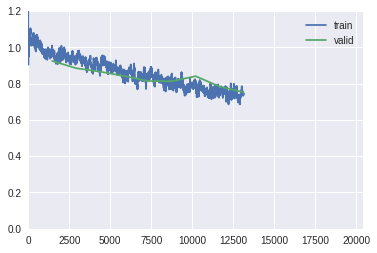

Buffered data was truncated after reaching the output size limit.

In [0]:
max_lr = 1e-4
max_lrs = [max_lr/9,max_lr/3,max_lr]
wds = [wd/9,wd/3,wd]
wd = 1e-6
learner.unfreeze()
learner.fit_one_cycle(cyc_len=14, max_lr=max_lrs, wd=wds)

epoch,train_loss,valid_loss,accuracy,time
0,0.720295,0.739363,0.704119,12:29
1,0.703938,0.740972,0.697712,12:29
2,0.651772,0.725328,0.705492,12:28
3,0.636017,0.725247,0.708238,12:29


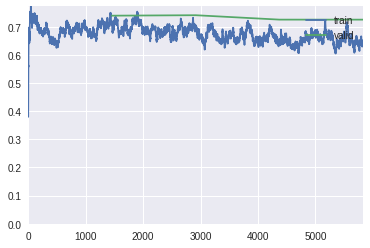

In [0]:
max_lr = 5e-5
max_lrs = [max_lr/9,max_lr/3,max_lr]
wds = [wd/9,wd/3,wd]
wd = 1e-6
learner.unfreeze()
learner.fit_one_cycle(cyc_len=4, max_lr=max_lrs, wd=wds)

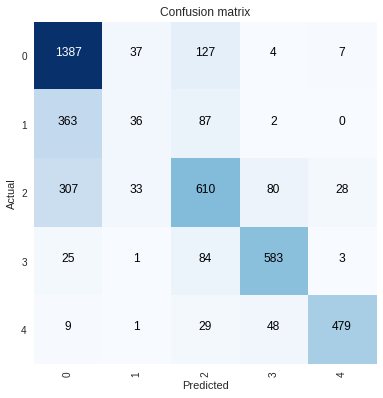

In [0]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(title='Confusion matrix')

In [0]:
from fastai.callbacks.hooks import *

# hook into forward pass
def hooked_backward(m, oneBatch, cat):
    # we hook into the convolutional part = m[0] of the model
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(oneBatch)
            preds[0,int(cat)].backward()
    return hook_a,hook_g


In [0]:
def getHeatmap(val_index):
    """Returns the validation set image and the activation map"""
    # this gets the model
    m = learner.model.eval()
    tensorImg,cl = data.valid_ds[val_index]
    # create a batch from the one image
    oneBatch,_ = data.one_item(tensorImg)
    oneBatch_im = vision.Image(data.denorm(oneBatch)[0])
    # convert batch tensor image to grayscale image with opencv
    cvIm = cv2.cvtColor(image2np(oneBatch_im.data), cv2.COLOR_RGB2GRAY)
    # attach hooks
    hook_a,hook_g = hooked_backward(m, oneBatch, cl)
    # get convolutional activations and average from channels
    acts = hook_a.stored[0].cpu()
    #avg_acts = acts.mean(0)

    # Grad-CAM
    grad = hook_g.stored[0][0].cpu()
    grad_chan = grad.mean(1).mean(1)
    grad.shape,grad_chan.shape
    mult = (acts*grad_chan[...,None,None]).mean(0)
    return mult, cvIm

In [0]:
from random import randint

def plot_heatmap_overview(interp:ClassificationInterpretation, classes=['Negative','Tumor']):
    # top losses will return all validation losses and indexes sorted by the largest first
    tl_val,tl_idx = interp.top_losses()
    #classes = interp.data.classes
    fig, ax = plt.subplots(3,4, figsize=(16,12))
    fig.suptitle('Grad-CAM\nPredicted / Actual / Loss / Probability',fontsize=20)
    # Random
    for i in range(4):
        random_index = randint(0,len(tl_idx))
        idx = tl_idx[random_index]
        act, im = getHeatmap(idx)
        H,W = im.shape
        _,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        ax[0,i].imshow(im)
        ax[0,i].imshow(im, cmap=plt.cm.gray)
        ax[0,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
              interpolation='bilinear', cmap='inferno')
        ax[0,i].set_xticks([])
        ax[0,i].set_yticks([])
        ax[0,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[0,0].set_ylabel('Random samples', fontsize=16, rotation=0, labelpad=80)
    # Most incorrect or top losses
    for i in range(4):
        idx = tl_idx[i]
        act, im = getHeatmap(idx)
        H,W = im.shape
        _,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        ax[1,i].imshow(im)
        ax[1,i].imshow(im, cmap=plt.cm.gray)
        ax[1,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
              interpolation='bilinear', cmap='inferno')
        ax[1,i].set_xticks([])
        ax[1,i].set_yticks([])
        ax[1,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[1,0].set_ylabel('Most incorrect\nsamples', fontsize=16, rotation=0, labelpad=80)
    # Most correct or least losses
    for i in range(4):
        idx = tl_idx[len(tl_idx) - i - 1]
        act, im = getHeatmap(idx)
        H,W = im.shape
        _,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        ax[2,i].imshow(im)
        ax[2,i].imshow(im, cmap=plt.cm.gray)
        ax[2,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
              interpolation='bilinear', cmap='inferno')
        ax[2,i].set_xticks([])
        ax[2,i].set_yticks([])
        ax[2,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[2,0].set_ylabel('Most correct\nsamples', fontsize=16, rotation=0, labelpad=80)

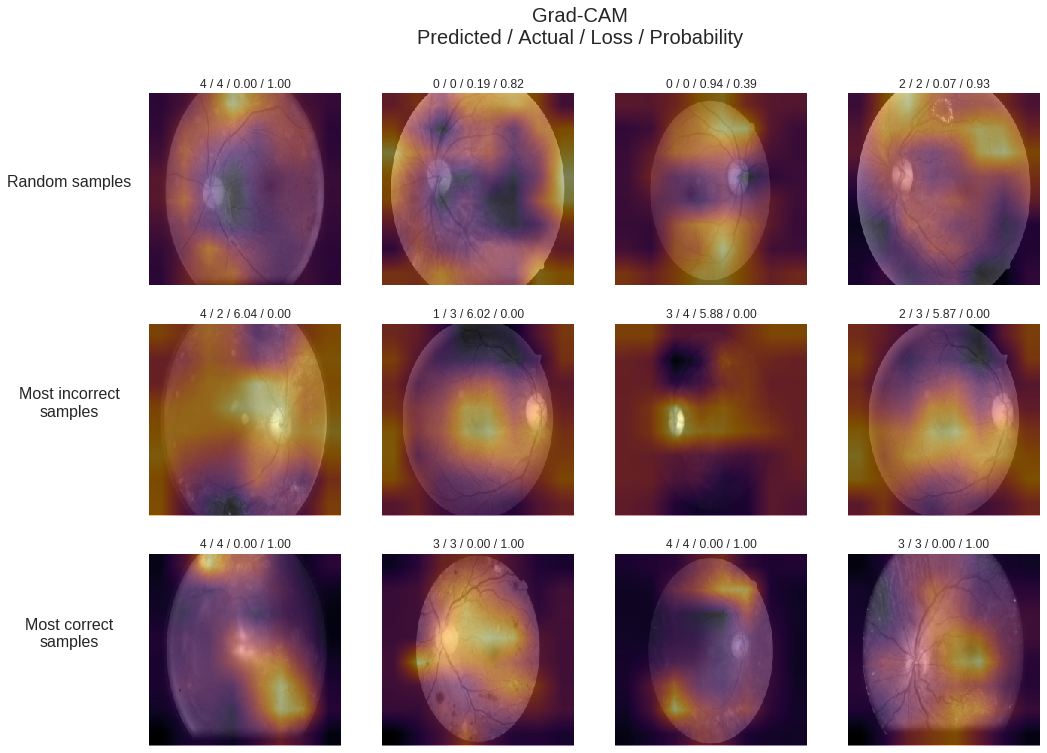

In [0]:
plot_heatmap_overview(interp, ['0','1','2','3','4'])